#Prediction_of_Data_Using_Keras

In [0]:
import keras
import tensorflow

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

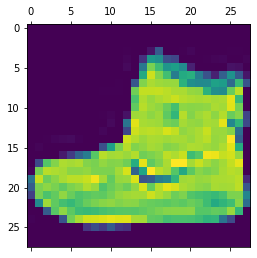

In [0]:
import matplotlib.pyplot as plt

plt.matshow(x_train[0])

In [0]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [0]:
# Normalization
x_train=x_train/255
x_test=x_test/255

In [0]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation

In [0]:
model=Sequential()

model.add(Flatten(input_shape=[28,28]))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="softmax"))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
Total params: 177,100
Trainable params: 177,100
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [0]:
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.4691 - accuracy: 0.8340
Epoch 2/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.4537 - accuracy: 0.8405
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.4417 - accuracy: 0.8440
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.4316 - accuracy: 0.8480
Epoch 5/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.4228 - accuracy: 0.8513


In [0]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 33us/step


[0.45176178102493286, 0.8374000191688538]

In [0]:
yp=model.predict(x_test)
yp

array([[8.2766485e-07, 4.4100698e-08, 5.6432877e-06, ..., 1.2803239e-10,
        1.2298906e-10, 1.5049519e-10],
       [9.5989439e-04, 8.8995857e-06, 9.0219283e-01, ..., 2.4711236e-13,
        1.8408474e-13, 1.7943191e-13],
       [2.3148761e-05, 9.9983537e-01, 4.2364099e-06, ..., 6.3343655e-13,
        6.7573171e-13, 5.5077606e-13],
       ...,
       [2.4844594e-02, 1.3698696e-06, 6.8495632e-04, ..., 2.4023403e-09,
        2.3444713e-09, 2.5714819e-09],
       [3.7977214e-05, 9.9786478e-01, 2.2297414e-05, ..., 4.0947475e-11,
        4.1637308e-11, 3.5593632e-11],
       [5.3791791e-05, 1.9861665e-05, 3.3331779e-04, ..., 4.4833883e-09,
        4.5700017e-09, 5.2502171e-09]], dtype=float32)

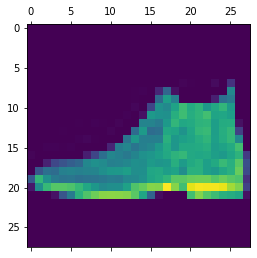

In [0]:
import numpy as np
plt.matshow(x_test[0])

In [0]:
np.argmax(yp[0])

9

In [0]:
class_label=["T-shirt/Top","pants","trouser","pullover","Dress","Coat","Sandal","Shirt","Bag","Ankle Boot"]

In [0]:
class_label[np.argmax(yp[0])]

'Ankle Boot'